In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("Symptom2Disease.csv")  # path to your dataset

# Split the data into training and testing sets
X = data["text"]
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train and evaluate the model
def train_and_evaluate_model(vectorizer, classifier):
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    classifier.fit(X_train_vectorized, y_train)
    y_pred = classifier.predict(X_test_vectorized)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    return accuracy, classification_rep

# Using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
accuracy_tfidf, classification_rep_tfidf = train_and_evaluate_model(tfidf_vectorizer, MultinomialNB())

# Using CountVectorizer (Bag of Words)
bow_vectorizer = CountVectorizer(max_features=5000, stop_words="english")
accuracy_bow, classification_rep_bow = train_and_evaluate_model(bow_vectorizer, MultinomialNB())

# Using Word-to-Bag Vectorizer (Simple word presence or absence)
word2bag_vectorizer = CountVectorizer(max_features=5000, stop_words="english", binary=True)
accuracy_word2bag, classification_rep_word2bag = train_and_evaluate_model(word2bag_vectorizer, MultinomialNB())

# Using bigram
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=5000, stop_words="english")
accuracy_bigram, classification_rep_bigram = train_and_evaluate_model(bigram_vectorizer, MultinomialNB())

# Using trigram
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=5000, stop_words="english")
accuracy_trigram, classification_rep_trigram = train_and_evaluate_model(trigram_vectorizer, MultinomialNB())

# Using Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
accuracy_rf, classification_rep_rf = train_and_evaluate_model(tfidf_vectorizer, random_forest_classifier)

# Using KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
accuracy_knn, classification_rep_knn = train_and_evaluate_model(tfidf_vectorizer, knn_classifier)

# Using SVM
svm_classifier = SVC(kernel='linear')
accuracy_svm, classification_rep_svm = train_and_evaluate_model(tfidf_vectorizer, svm_classifier)

# Print results
print("Results using TF-IDF Vectorizer:")
print(f"Accuracy: {accuracy_tfidf:.2f}")
print("Classification Report:")
print(classification_rep_tfidf)

print("\nResults using Bag of Words (CountVectorizer):")
print(f"Accuracy: {accuracy_bow:.2f}")
print("Classification Report:")
print(classification_rep_bow)

print("\nResults using Word-to-Bag Vectorizer:")
print(f"Accuracy: {accuracy_word2bag:.2f}")
print("Classification Report:")
print(classification_rep_word2bag)

print("\nResults using Bigram:")
print(f"Accuracy: {accuracy_bigram:.2f}")
print("Classification Report:")
print(classification_rep_bigram)

print("\nResults using Trigram:")
print(f"Accuracy: {accuracy_trigram:.2f}")
print("Classification Report:")
print(classification_rep_trigram)

print("\nResults using Random Forest:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report:")
print(classification_rep_rf)

print("\nResults using KNN:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:")
print(classification_rep_knn)

print("\nResults using SVM:")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Classification Report:")
print(classification_rep_svm)


Results using TF-IDF Vectorizer:
Accuracy: 0.94
Classification Report:
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.85      0.92      0.88        12
                    Common Cold       0.92      1.00      0.96        12
                         Dengue       0.90      0.75      0.82        12
          Dimorphic Hemorrhoids       0.70      1.00      0.82         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00

TF-IDF + Naive Bayes - Accuracy: 0.94
Bag of Words + Naive Bayes - Accuracy: 0.95
Word-to-Bag + Naive Bayes - Accuracy: 0.95
Bigram + Naive Bayes - Accuracy: 0.88
Trigram + Naive Bayes - Accuracy: 0.75
TF-IDF + Random Forest - Accuracy: 0.97
TF-IDF + KNN - Accuracy: 0.95
TF-IDF + SVM - Accuracy: 0.99


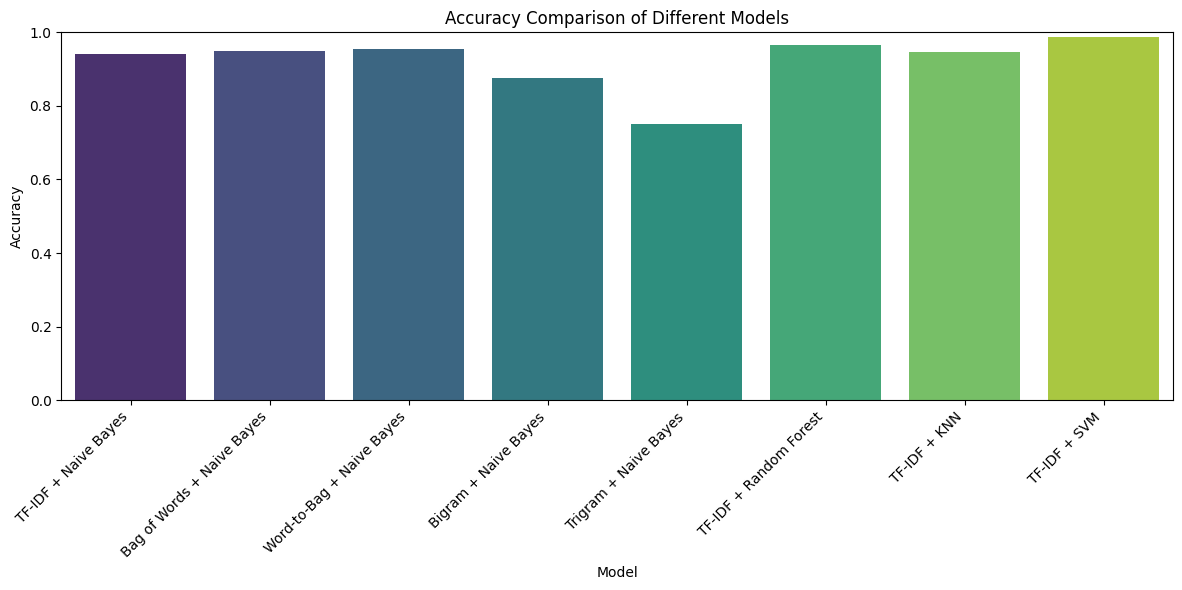

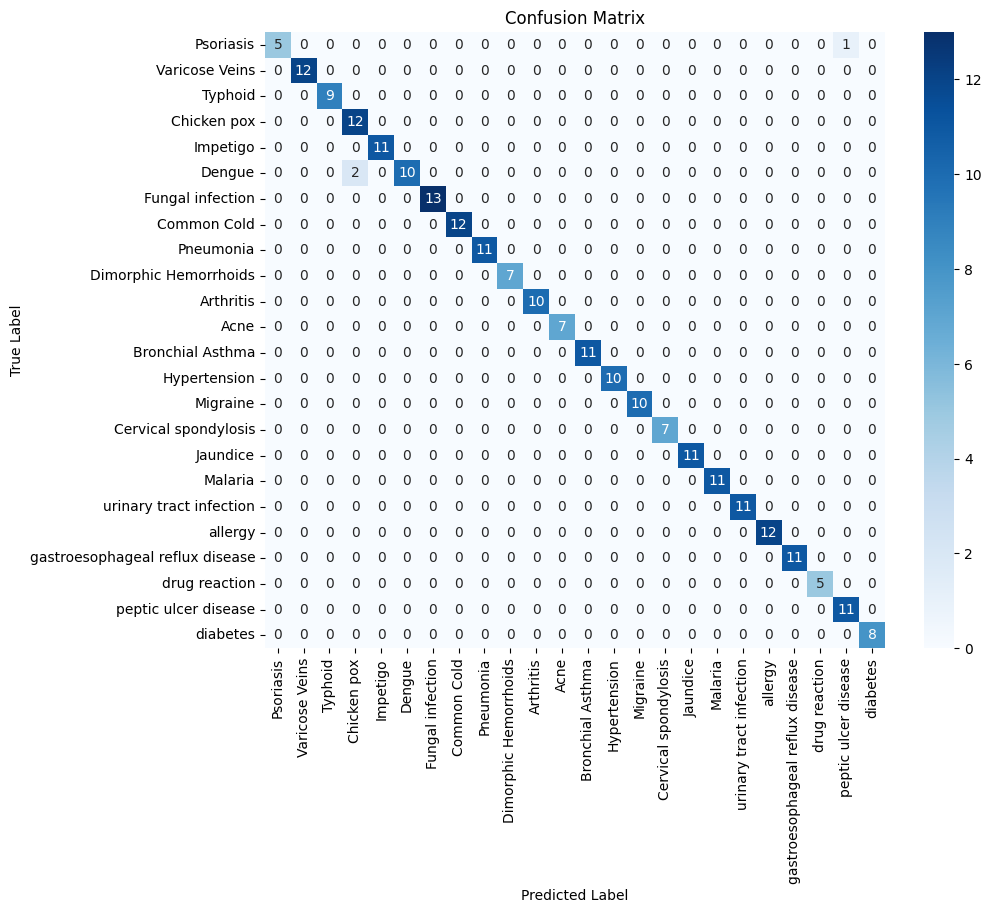

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Create a list of models and vectorizers
models = [
    ("TF-IDF + Naive Bayes", tfidf_vectorizer, MultinomialNB()),
    ("Bag of Words + Naive Bayes", bow_vectorizer, MultinomialNB()),
    ("Word-to-Bag + Naive Bayes", word2bag_vectorizer, MultinomialNB()),
    ("Bigram + Naive Bayes", bigram_vectorizer, MultinomialNB()),
    ("Trigram + Naive Bayes", trigram_vectorizer, MultinomialNB()),
    ("TF-IDF + Random Forest", tfidf_vectorizer, random_forest_classifier),
    ("TF-IDF + KNN", tfidf_vectorizer, knn_classifier),
    ("TF-IDF + SVM", tfidf_vectorizer, svm_classifier)
]

# Train and evaluate models
accuracies = []
for model_name, vectorizer, classifier in models:
    accuracy, _ = train_and_evaluate_model(vectorizer, classifier)
    accuracies.append(accuracy)
    print(f"{model_name} - Accuracy: {accuracy:.2f}")

# Plot the accuracy comparison graph
plt.figure(figsize=(12, 6))
sns.barplot(x=[m[0] for m in models], y=accuracies, palette="viridis")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.tight_layout()
plt.show()

# Plot the confusion matrix for the best model
best_model_idx = np.argmax(accuracies)
best_model_name, best_vectorizer, best_classifier = models[best_model_idx]
X_train_vectorized = best_vectorizer.fit_transform(X_train)
X_test_vectorized = best_vectorizer.transform(X_test)
best_classifier.fit(X_train_vectorized, y_train)
y_pred = best_classifier.predict(X_test_vectorized)
plot_confusion_matrix(y_test, y_pred, classes=data["label"].unique())


In [7]:
import pickle

# Create a list of models and vectorizers
models = [
    ("TF-IDF + Naive Bayes", tfidf_vectorizer, MultinomialNB()),
    ("Bag of Words + Naive Bayes", bow_vectorizer, MultinomialNB()),
    ("Word-to-Bag + Naive Bayes", word2bag_vectorizer, MultinomialNB()),
    ("Bigram + Naive Bayes", bigram_vectorizer, MultinomialNB()),
    ("Trigram + Naive Bayes", trigram_vectorizer, MultinomialNB()),
    ("TF-IDF + Random Forest", tfidf_vectorizer, random_forest_classifier),
    ("TF-IDF + KNN", tfidf_vectorizer, knn_classifier),
    ("TF-IDF + SVM", tfidf_vectorizer, svm_classifier)
]

# Train and evaluate models
best_model_idx = -1
best_accuracy = 0.0

for idx, (model_name, vectorizer, classifier) in enumerate(models):
    accuracy, _ = train_and_evaluate_model(vectorizer, classifier)
    print(f"{model_name} - Accuracy: {accuracy:.2f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_idx = idx

# Choose the best model
best_model_name, best_vectorizer, best_classifier = models[best_model_idx]

# Save the best model to a pickle file
with open("best_model.pickle", "wb") as f:
    best_model = {
        "vectorizer": best_vectorizer,
        "classifier": best_classifier
    }
    pickle.dump(best_model, f)

print(f"\nBest Model: {best_model_name} (Accuracy: {best_accuracy:.2f})")
print("Best model has been saved to 'best_model.pickle'.")


TF-IDF + Naive Bayes - Accuracy: 0.94
Bag of Words + Naive Bayes - Accuracy: 0.95
Word-to-Bag + Naive Bayes - Accuracy: 0.95
Bigram + Naive Bayes - Accuracy: 0.88
Trigram + Naive Bayes - Accuracy: 0.75
TF-IDF + Random Forest - Accuracy: 0.97
TF-IDF + KNN - Accuracy: 0.95
TF-IDF + SVM - Accuracy: 0.99

Best Model: TF-IDF + SVM (Accuracy: 0.99)
Best model has been saved to 'best_model.pickle'.


In [8]:
import pickle

# Load the best model from the pickle file
with open("best_model.pickle", "rb") as f:
    best_model = pickle.load(f)

best_vectorizer = best_model["vectorizer"]
best_classifier = best_model["classifier"]

# Example usage: Make predictions with the loaded model
symptoms = ["itchy rash on arms and legs", "fever and headache", "difficulty breathing"]
X_new = best_vectorizer.transform(symptoms)
predictions = best_classifier.predict(X_new)

# Print the predictions
for symptom, prediction in zip(symptoms, predictions):
    print(f"Symptom: {symptom}")
    print(f"Predicted Disease: {prediction}")
    print()


Symptom: itchy rash on arms and legs
Predicted Disease: Dengue

Symptom: fever and headache
Predicted Disease: Chicken pox

Symptom: difficulty breathing
Predicted Disease: allergy

